**Convolutional network** é como se fosse uma forma de filtrar uma imagem
onde ele pega uma caracteristica da imagem e prediz ela.

No exemplo das imagens, evita de pegar todo pixel de toda imagem e toma a decisão a partir desse filtro, poupando tempo e custos computacionais.

Por exemplo: excluindo pixels muito distantes, de canto por exemplo, que sejam inúteis na determinação do que é aquela imagem

Para fazer isso, ela olha diretamente pros vizinhos dos pixels. Para cada pixel, pega seu valor e observa o valor dos seus vizinhos. Para obter um novo valor para esse pixel, simplesmente se multiplica o valor desses vizinhos do pixel pelo dos seus próprios vizinhos, o novo valor do pixel vai ser a soma desses valores.

 <img src="conv.png" />


A idéia é que enfatize caracterísiticas importantes de uma imagem, por exemplo.

 <img src="conv2.png" />
 
Convolutional network se torna bastante interessante quando se trabalha junto com **pooling**



 



**pooling** é uma forma de compressar uma imagem, uma maneira rápida de fazer isso é observar 4 pixels a cada instante numa imagem ao invés de 1, pegando um pixel e observando seus vizinhos e desses 4 pixels pegar o de maior valor e mante-lo.
 <img src="pool.png" />


In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [2]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
    #adiciona a convolução e o pooling antes da rede neural normal
    # Add convolutions and max pooling
  
  #  recebe como parametros: numero de convoluções,tamanho da convolução...  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  # MaxPooling2D mantem o que foi destacado pela convolução mas compressa a imagem
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
#mostra uma tabela com os outputs após cada operação
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

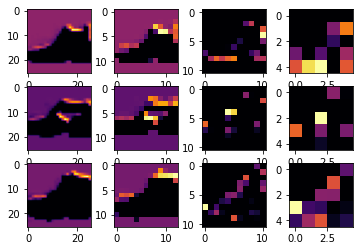

In [3]:
#vamos observar como funcionam graficamente
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)